In [1]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
model_hf = GPT2LMHeadModel.from_pretrained('gpt2', device_map="cuda")
sd_hf = model_hf.state_dict()
# wte = weight token embeddings
# wpe = lookup table for the positions, gpt2 has 1024 length
# so positional embedding is learning as well i guess

c:\Users\NeelR\.conda\envs\biollama\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
for k, v in sd_hf.items():
    print(k, v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [1]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2', device='cuda')
set_seed(42)
generator("Hello, I'm a language model,", max_length=30, num_return_sequences=5)

c:\Users\NeelR\.conda\envs\biollama\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, I'm a language model, so that makes a lot of sense. (laughter) That's why it comes here, that's why I"},
 {'generated_text': 'Hello, I\'m a language model, my brain is a model. Maybe I should stop pretending that I understand human language and start practicing it." And'},
 {'generated_text': 'Hello, I\'m a language model, I\'m not a programmer. This is good, you understand.\n\n"But there is something that you'},
 {'generated_text': "Hello, I'm a language model, and that's why I feel so strongly about this game.\n\nI think games don't make a lot"},
 {'generated_text': 'Hello, I\'m a language model, it\'s called a macro. But I don\'t really understand them yet."\n\nWhile the program is very'}]

In [1]:
with open('input.txt', 'r') as f:
    text = f.read()
data = text[0:100]
data

'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'

In [3]:
import tiktoken
enc = tiktoken.get_encoding('gpt2')
tokens = enc.encode(data)
print(tokens[:24])

[5962, 22307, 25, 198, 8421, 356, 5120, 597, 2252, 11, 3285, 502, 2740, 13, 198, 198, 3237, 25, 198, 5248, 461, 11, 2740, 13]


In [4]:
import torch
buff = torch.tensor(tokens)
diff = buff.view(4,6)
diff

RuntimeError: shape '[4, 6]' is invalid for input of size 31

In [17]:
char_to_id = {}
char_to_id["<bos>"] = 0

for i in range(1,101):
    char_to_id[str(i)] = i
char_to_id["+"] = i + 1
char_to_id["="] = i + 2
char_to_id["<pad>"] = i + 3
char_to_id["<unk>"] = i + 4
char_to_id["<mask>"] = i + 5
char_to_id["<eos>"] = i + 6
print(char_to_id)
sum_string_ex = "<bos>18+19=37<eos>"

{'<bos>': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12, '13': 13, '14': 14, '15': 15, '16': 16, '17': 17, '18': 18, '19': 19, '20': 20, '21': 21, '22': 22, '23': 23, '24': 24, '25': 25, '26': 26, '27': 27, '28': 28, '29': 29, '30': 30, '31': 31, '32': 32, '33': 33, '34': 34, '35': 35, '36': 36, '37': 37, '38': 38, '39': 39, '40': 40, '41': 41, '42': 42, '43': 43, '44': 44, '45': 45, '46': 46, '47': 47, '48': 48, '49': 49, '50': 50, '51': 51, '52': 52, '53': 53, '54': 54, '55': 55, '56': 56, '57': 57, '58': 58, '59': 59, '60': 60, '61': 61, '62': 62, '63': 63, '64': 64, '65': 65, '66': 66, '67': 67, '68': 68, '69': 69, '70': 70, '71': 71, '72': 72, '73': 73, '74': 74, '75': 75, '76': 76, '77': 77, '78': 78, '79': 79, '80': 80, '81': 81, '82': 82, '83': 83, '84': 84, '85': 85, '86': 86, '87': 87, '88': 88, '89': 89, '90': 90, '91': 91, '92': 92, '93': 93, '94': 94, '95': 95, '96': 96, '97': 97, '98': 98, '99': 99, '100': 100, '+'

In [18]:
# huge props to skyzip and jbm on https://stackoverflow.com/questions/69531811/using-hugginface-transformers-and-tokenizers-with-a-fixed-vocabulary
import json
from pathlib import Path
from typing import Optional, Tuple, Dict, Union

from transformers import PreTrainedTokenizer


class APTTokenizer(PreTrainedTokenizer):
    def __init__(self, vocab: Union[Dict[str, int], str], max_len: int = None):
        if isinstance(vocab, str):
            vocab_path = Path(vocab)
            with open(vocab_path, 'r') as f:
                self._token_ids = json.load(f)
        else:
            self._token_ids = vocab
            
        self._id_tokens: Dict[int, str] = {value: key for key, value in self._token_ids.items()}
        super().__init__(max_len=max_len)

        # Initialize special tokens for RoBERTa
        self.unk_token = '<unk>'
        self.pad_token = '<pad>'
        self.bos_token = '<bos>'
        self.eos_token = '<eos>'
        self.mask_token = '<mask>'
        self.unk_token_id = self._token_ids.get(self.unk_token, 0)
        self.pad_token_id = self._token_ids.get(self.pad_token, 1)
        self.bos_token_id = self._token_ids.get(self.bos_token, 2)
        self.eos_token_id = self._token_ids.get(self.eos_token, 3)
        self.mask_token_id = self._token_ids.get(self.mask_token, 4)

    def _tokenize(self, text: str, **kwargs):
        return text.split(' ')

    def _convert_token_to_id(self, token: str) -> int:
        return self._token_ids[token] if token in self._token_ids else self.unk_token_id

    def _convert_id_to_token(self, index: int) -> str:
        return self._id_tokens[index] if index in self._id_tokens else self.unk_token

    def get_vocab(self) -> Dict[str, int]:
        return self._token_ids.copy()

    def save_vocabulary(self, save_directory: str, filename_prefix: Optional[str] = None) -> Tuple[str]:
        if filename_prefix is None:
            filename_prefix = ''
        vocab_path = Path(save_directory, filename_prefix + 'vocab.json')
        with open(vocab_path, 'w') as f:
            json.dump(self._token_ids, f)
        return (str(vocab_path),)

    @property
    def vocab_size(self) -> int:
        return len(self._token_ids)


# your custom, fixed vocabulary
custom_vocab = {
    '<unk>': 0,
    'word0': 1,
    'word1': 2,
    'word2': 3,
    'word3': 4,
    'word4': 5,
    'word5': 6,
    '<bos>': 7,
    '<eos>': 8,
    '<pad>': 9,
    '<mask>': 10
}
model_max_len = 8

# Optionally specify the path to a vocab file
vocab_path = 'path/to/vocab.json'

# You can either pass the custom vocab dictionary or the path to the vocab file
tokenizer = APTTokenizer(char_to_id, max_len=model_max_len)

# res = tokenizer(
#     [
#         'word1 word2 word word1 word3',
#         'word2 word0 word0 word3 word5 word4 word2 word1 word0'
#     ],
#     padding=True,
#     truncation=True
# )
# res

res = tokenizer(
    [
        "<bos>18+19=37<eos>",
        "<bos>2+43=45<eos>",
    ],
    padding=True,
    truncation=True,
)
res

{'input_ids': [[104], [104]], 'token_type_ids': [[0], [0]], 'attention_mask': [[1], [1]]}

In [20]:
print(char_to_id)

{'<bos>': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12, '13': 13, '14': 14, '15': 15, '16': 16, '17': 17, '18': 18, '19': 19, '20': 20, '21': 21, '22': 22, '23': 23, '24': 24, '25': 25, '26': 26, '27': 27, '28': 28, '29': 29, '30': 30, '31': 31, '32': 32, '33': 33, '34': 34, '35': 35, '36': 36, '37': 37, '38': 38, '39': 39, '40': 40, '41': 41, '42': 42, '43': 43, '44': 44, '45': 45, '46': 46, '47': 47, '48': 48, '49': 49, '50': 50, '51': 51, '52': 52, '53': 53, '54': 54, '55': 55, '56': 56, '57': 57, '58': 58, '59': 59, '60': 60, '61': 61, '62': 62, '63': 63, '64': 64, '65': 65, '66': 66, '67': 67, '68': 68, '69': 69, '70': 70, '71': 71, '72': 72, '73': 73, '74': 74, '75': 75, '76': 76, '77': 77, '78': 78, '79': 79, '80': 80, '81': 81, '82': 82, '83': 83, '84': 84, '85': 85, '86': 86, '87': 87, '88': 88, '89': 89, '90': 90, '91': 91, '92': 92, '93': 93, '94': 94, '95': 95, '96': 96, '97': 97, '98': 98, '99': 99, '100': 100, '+'

In [11]:
import json
text = [
        "<bos> 18 + 19 = 37 <eos>",
        "<bos> 2 + 43 = 45 <eos>",
        "<bos> 3 + 4 = 7 <eos>",
        "<bos> 1 + 2 = 3 <eos>",
        ]

# summand_a = 1
# summand_b = 2 
# sum = summand_a + summand_b
# f"<bos> {summand_a} + {summand_b} = {sum} <eos>"
output_list = []
for summand_a in range(1,51):
    for summand_b in range(1,51):
        sum = summand_a + summand_b
        summand_a_str = " ".join( [digit for digit in str(summand_a)] )
        if len(summand_a_str) == 1:
            summand_a_str = "0 " + summand_a_str
        summand_b_str = " ".join( [digit for digit in str(summand_b)] )
        if len(summand_b_str) == 1:
            summand_b_str = "0 " + summand_b_str
        sum_str = " ".join( [digit for digit in str(sum)])
        if len(sum_str) == 1:
            sum_str = "0 " + sum_str
        sample = f"<bos> {summand_a_str} + {summand_b_str} = {sum_str} <eos>"
        # print(sample)
        output_list.append(sample)
        # break
    # break
print(len(output_list))
with open('datasets/sum_dataset.json', 'w') as f:
    json.dump(output_list, f)
output_list
for elt in output_list:
    print(elt)
    assert (len(elt) == 27 or elt == "<bos> 5 0 + 5 0 = 1 0 0 <eos>")

2500
<bos> 0 1 + 0 1 = 0 2 <eos>
<bos> 0 1 + 0 2 = 0 3 <eos>
<bos> 0 1 + 0 3 = 0 4 <eos>
<bos> 0 1 + 0 4 = 0 5 <eos>
<bos> 0 1 + 0 5 = 0 6 <eos>
<bos> 0 1 + 0 6 = 0 7 <eos>
<bos> 0 1 + 0 7 = 0 8 <eos>
<bos> 0 1 + 0 8 = 0 9 <eos>
<bos> 0 1 + 0 9 = 1 0 <eos>
<bos> 0 1 + 1 0 = 1 1 <eos>
<bos> 0 1 + 1 1 = 1 2 <eos>
<bos> 0 1 + 1 2 = 1 3 <eos>
<bos> 0 1 + 1 3 = 1 4 <eos>
<bos> 0 1 + 1 4 = 1 5 <eos>
<bos> 0 1 + 1 5 = 1 6 <eos>
<bos> 0 1 + 1 6 = 1 7 <eos>
<bos> 0 1 + 1 7 = 1 8 <eos>
<bos> 0 1 + 1 8 = 1 9 <eos>
<bos> 0 1 + 1 9 = 2 0 <eos>
<bos> 0 1 + 2 0 = 2 1 <eos>
<bos> 0 1 + 2 1 = 2 2 <eos>
<bos> 0 1 + 2 2 = 2 3 <eos>
<bos> 0 1 + 2 3 = 2 4 <eos>
<bos> 0 1 + 2 4 = 2 5 <eos>
<bos> 0 1 + 2 5 = 2 6 <eos>
<bos> 0 1 + 2 6 = 2 7 <eos>
<bos> 0 1 + 2 7 = 2 8 <eos>
<bos> 0 1 + 2 8 = 2 9 <eos>
<bos> 0 1 + 2 9 = 3 0 <eos>
<bos> 0 1 + 3 0 = 3 1 <eos>
<bos> 0 1 + 3 1 = 3 2 <eos>
<bos> 0 1 + 3 2 = 3 3 <eos>
<bos> 0 1 + 3 3 = 3 4 <eos>
<bos> 0 1 + 3 4 = 3 5 <eos>
<bos> 0 1 + 3 5 = 3 6 <eos>
<bos> 0 1 + 3 6

In [1]:
"""This script is to help me understand how the heck bertviz works and what adaptations to APT are necessary to visualise attention with it"""
# System imports
import time
import os
import pickle

# External imports
import torch
from tqdm import tqdm
from bertviz import model_view
from transformers import utils, AutoModelForCausalLM, AutoTokenizer

# Local imports
from arithmetic_pretrained_transformer import APT, APTConfig, DataLoaderLite
from arithmetic_tokenizer import ArithmeticTokenizer

# Environment prep
torch.manual_seed(42)
torch.cuda.manual_seed(42)
torch.mps.manual_seed(42)
torch.set_printoptions(sci_mode=False)
# attempt to auto recognize the device!
device = "cpu"
if torch.cuda.is_available(): device = "cuda"
elif hasattr(torch.backends, "mps") and torch.backends.mps.is_available(): device = "mps"
print(f"using device {device}")
utils.logging.set_verbosity_error()  # Suppress standard warnings

# ------------------------------------------------------------------------------------------- #

# questions to pass to the model 
questions = [
    "<bos> 3 1 + 1 3 =", # 4 4 <eos>
    "<bos> 3 1 + 1 4 =", # 4 5 <eos>
    "<bos> 3 1 + 1 5 =", # 4 6 <eos>
    "<bos> 3 1 + 1 6 =", # 4 7 <eos>
]
# question = "13+4"
# prompt = f"Question: What is {question}? Answer: {question}="

apt = True
if apt:
    filename = 'apt_checkpoints/base/finalized_model.sav'
    model = pickle.load(open(filename, 'rb'))
    model.config.output_attentions = True
    vocab_path = 'tokenizer/sum_0-9_vocab.json'
    tokenizer = ArithmeticTokenizer(vocab_path)
else:
    # model_id = "allenai/OLMo-1B-0724-hf"
    model_id = "meta-llama/Meta-Llama-3-8B-Instruct"
    # model_id = "EleutherAI/pythia-1.4b-deduped"
    if "llama" not in model_id: 
        cache_dir = "./models/" + model_id
    else:
        cache_dir = None
    model = AutoModelForCausalLM.from_pretrained(
        pretrained_model_name_or_path=model_id,
        cache_dir=cache_dir,
        device_map=device,
        output_attentions=True,
        )
    tokenizer = AutoTokenizer.from_pretrained(
        pretrained_model_name_or_path=model_id,
        cache_dir=cache_dir,
        )

prompt = questions[3]
input_ids = tokenizer.encode(prompt, return_tensors='pt').to(device)  # Tokenize input text
outputs = model(input_ids)  # Run model
attention = outputs[-1]  # Retrieve attention from model outputs
# we copy attention and append it to 
tokens = tokenizer.convert_ids_to_tokens(input_ids[0])  # Convert input ids to token strings
model_view(
    attention, 
    tokens, 
    # include_layers=list(range(28,32))
    )  # Display model view

/Users/s2011847/repos/APT/.apt_venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


using device mps
using device mps


<IPython.core.display.Javascript object>

In [2]:
questions = [
    "<bos> 3 1 + 1 3 =", # 4 4 <eos>
    "<bos> 3 1 + 1 4 =", # 4 5 <eos>
    "<bos> 3 1 + 1 5 =", # 4 6 <eos>
    "<bos> 3 1 + 1 6 =", # 4 7 <eos>
]

(7, 14)


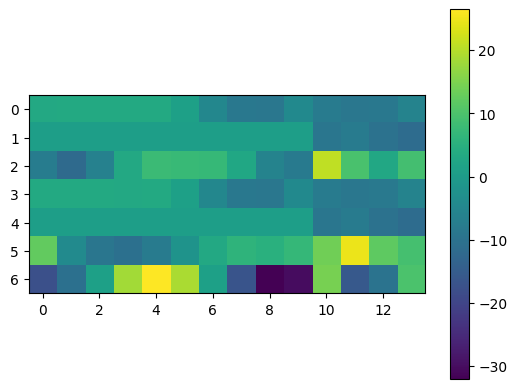

In [7]:
logits = outputs[0].squeeze().cpu().detach().numpy()
print(logits.shape)
import matplotlib.pyplot as plt
plt.imshow(logits, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.show()